In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import  make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal,uniform, randint


OBTENER LOS DATOS

In [4]:
df_transacciones = pd.read_csv("../../../datos/creditcard.csv", delimiter=";")

EXPLORAR LOS DATOS

In [5]:
df_transacciones.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df_transacciones.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


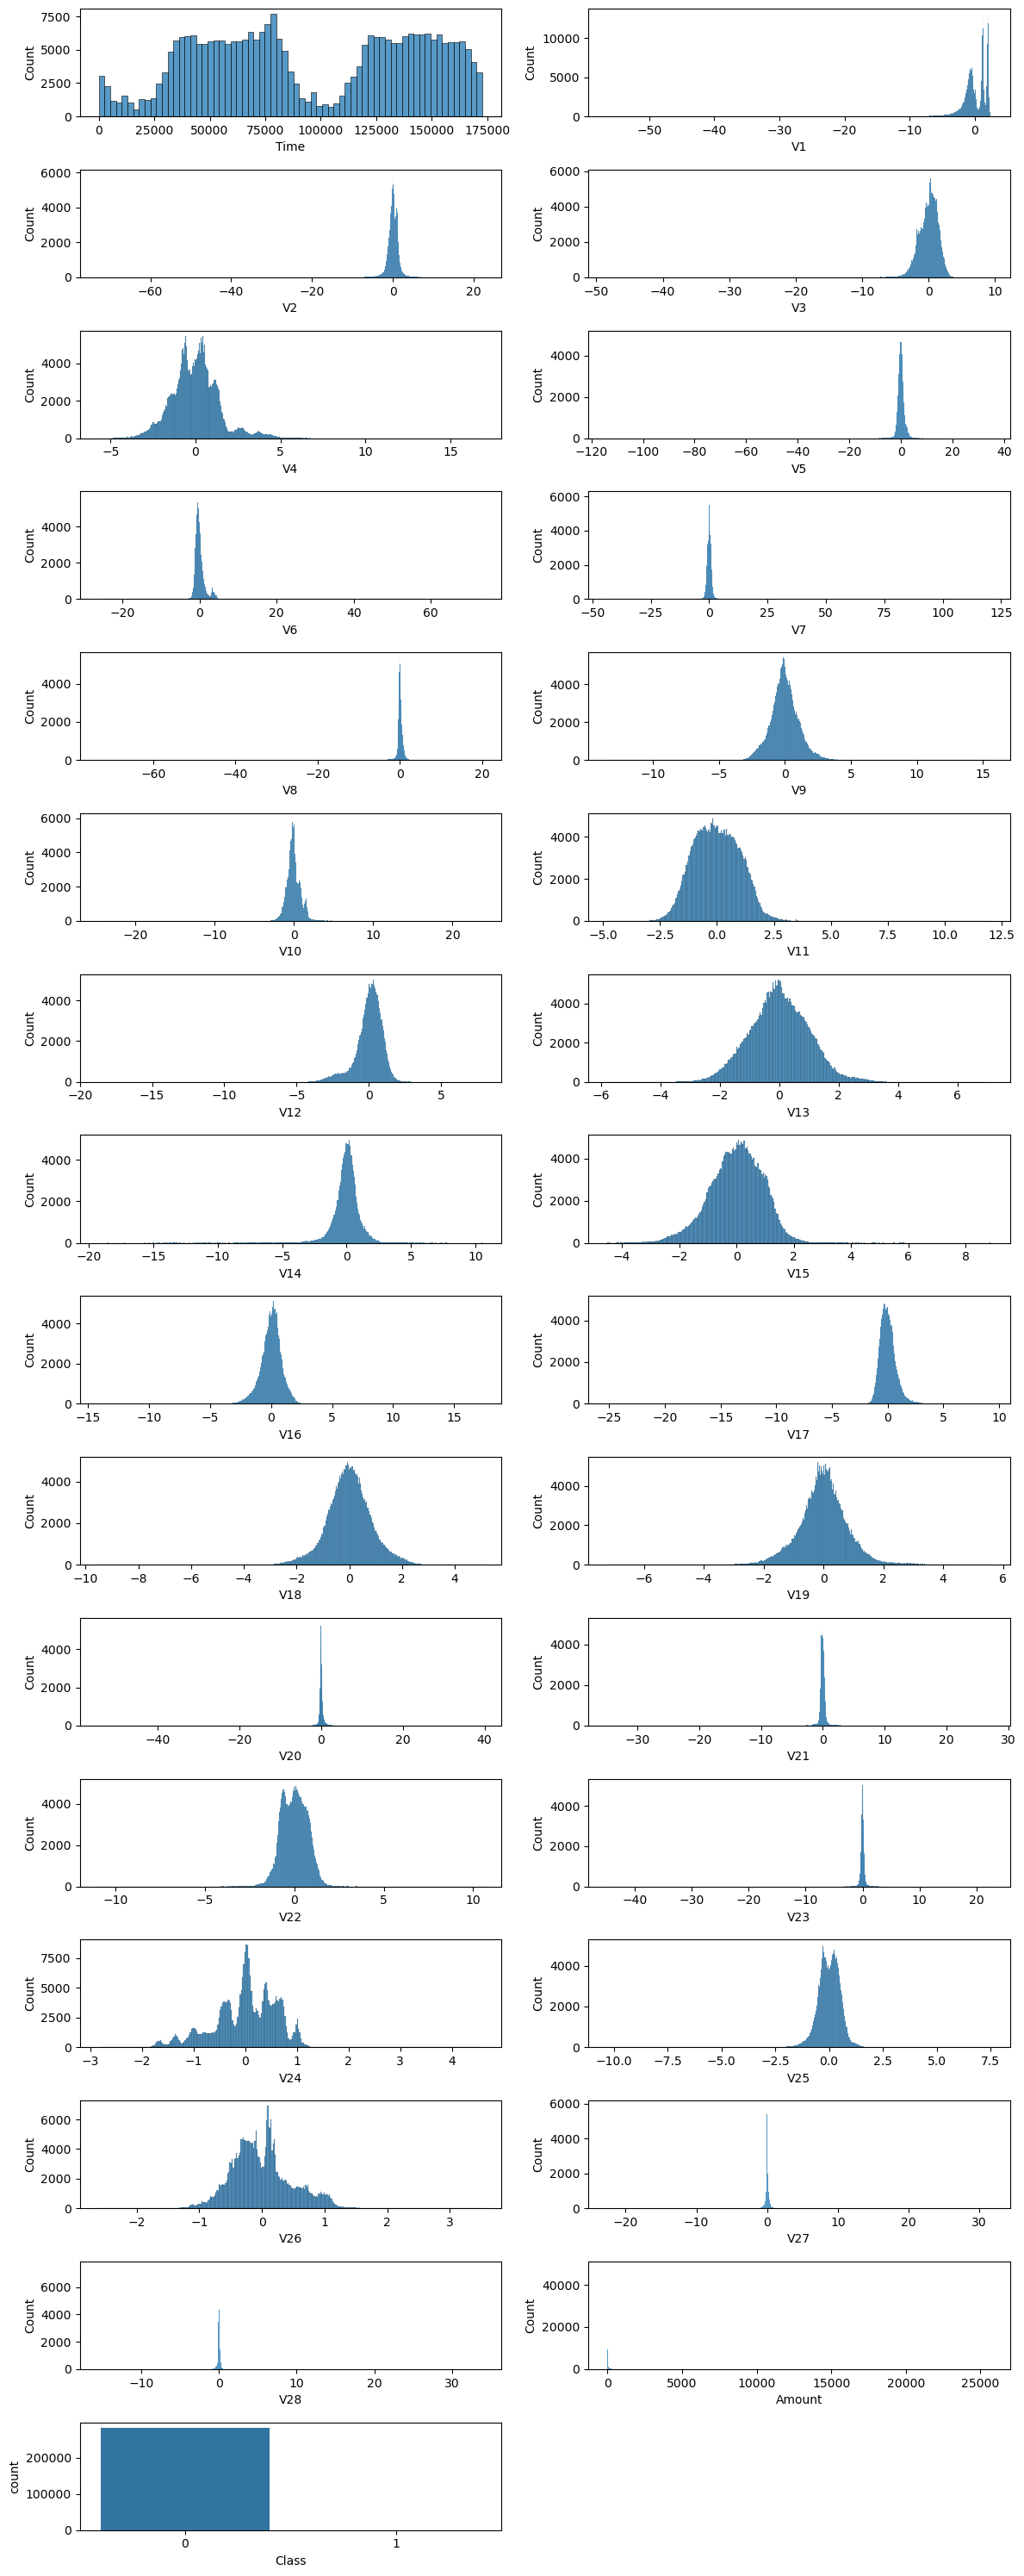

In [49]:
columnas = df_transacciones.columns.tolist()
columnas.remove("Class")
plt.figure(figsize=(12, 30)) 

subplot_index = 1

for col in columnas:
    plt.subplot(16, 2, subplot_index)
    sns.histplot(x=df_transacciones[col])
    subplot_index += 1

plt.subplot(16, 2, subplot_index)
sns.countplot(x=df_transacciones["Class"])

plt.tight_layout()
plt.show()

In [ ]:
#Todas las variables menos Time, Amount y Class han sido obtenidos con PCA.
#Vemos que la clase objetivo Class está muy desbalanceada, tendremos que tener esto en cuenta a la hora de dicidir los datos.

In [10]:
corr_matrix = df_transacciones.corr(numeric_only=True)

In [11]:
#Matriz de correlación de todas las variables.
corr_matrix.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [ ]:
#Las variables que se han obtenido usando PCA no tienen correlación entre ellos, esto se debe a la propia naturaleza de PCA que reduce la dimensionalidad y crea componenentes que sean ortogonales entre sí.
#Lo que realmente nos interesa son las correlaciones con la variable objetivo.

In [13]:
#Valores de correlación de Class con todas las variables
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
#Vamos a eliminar algunas columnas debido a que practicamente no estan relacionadas con la y. Todas las que tengan una relación menor a 0,04 las vamos a eliminar.

In [18]:
df_transacciones_dropped = df_transacciones.drop(columns=["V25", "V22", "V23", "V15", "V13", "V24", "Time"])

### PREPARAR LOS DATOS

In [22]:
#Estratificamos los datos por la columna Class ya que los datos estan muy desbalanceados y queremos conseguir el mejor resultado posible con los datos que tenemos.
train_set, test_set = train_test_split(df_transacciones_dropped, test_size=0.20, stratify=df_transacciones_dropped['Class'], random_state=42)

#Dividimos los datos 
X_train= train_set.drop(columns=["Class"])
y_train= train_set["Class"].copy()

X_test= test_set.drop(columns=["Class"])
y_test= test_set["Class"].copy()


In [ ]:
#Hemos decidido no transformar demasiado los datos y crear los pipelines solamente usando StandardScale y el algoritmo en cada caso.
#Al tener variables transformadas con PCA de primeras, no sabemos realmente que reflejan y hemos decidido no hacer más transformaciones basándonos solamente en los gráficos.

## ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Regresión logistica
Matriz de confusion:
[[227414     37]
 [   151    243]]
Exactitud: 0.999174877658057
Precision: 0.8678571428571429
Sensibilidad: 0.616751269035533
F1: 0.7210682492581603
AUC: 0.9739362170202017


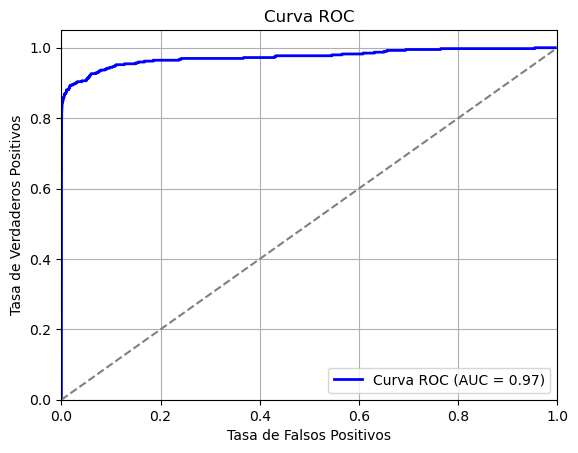

SGDClassifier
Matriz de confusion:
[[227420     31]
 [   161    233]]
Exactitud: 0.9991573218635476
Precision: 0.8825757575757576
Sensibilidad: 0.5913705583756346
F1: 0.7082066869300911
AUC: 0.9715092648838941


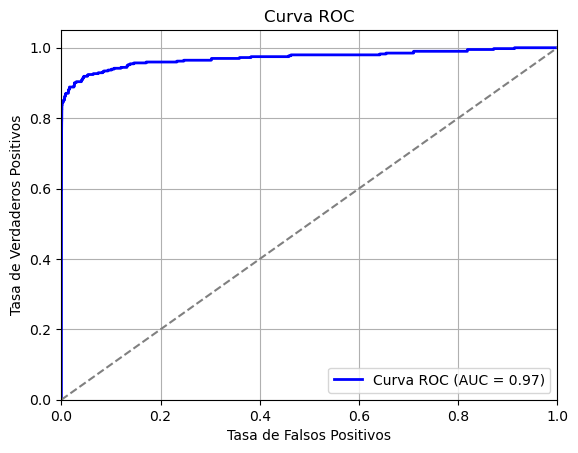

K vecinos mas cercanos
Matriz de confusion:
[[227434     17]
 [    85    309]]
Exactitud: 0.9995523272400096
Precision: 0.9478527607361963
Sensibilidad: 0.7842639593908629
F1: 0.8583333333333333
Random Forest
Matriz de confusion:
[[227431     20]
 [    89    305]]
Exactitud: 0.9995216045996181
Precision: 0.9384615384615385
Sensibilidad: 0.7741116751269036
F1: 0.8484005563282336


In [27]:
#Lista de modelos que usaremos en el entrenamiento
models={
    "Regresión logistica": LogisticRegression(random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "K vecinos mas cercanos": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=42),
}

#Bucle que crea pipelines, los entrena y saca las métricas utilizando validación cruzada.
for name, algoritmo in models.items():

    #Estandarizamos los datos
    scaler= StandardScaler()

    model = make_pipeline(scaler, algoritmo)

    print(name)

    predic=cross_val_predict(model, X_train, y_train, cv=10)

    #Matriz de confusion
    cm = confusion_matrix(y_train, predic)
    print(f"Matriz de confusion:")
    print(cm)

    #Exactitud
    print(f"Exactitud: {accuracy_score(y_train, predic)}")

    #Precision
    print(f"Precision: {precision_score(y_train, predic)}")

    #Sensibilidad
    print(f"Sensibilidad: {recall_score(y_train, predic)}")

    #F1
    print(f"F1: {f1_score(y_train, predic)}")

    if hasattr(model, "decision_function"):
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=3, method="decision_function")
        fpr, tpr, _ = roc_curve(y_train, y_train_pred)
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc}")
        plt.figure()
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("Tasa de Falsos Positivos")
        plt.ylabel("Tasa de Verdaderos Positivos")
        plt.title("Curva ROC")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    

In [ ]:
#La metrica que vamos a utilizar va a ser la sensibilidad, ya que lo más importante para nosotros es detectar todos los posible casos de fraude, aunque esto conlleve tener falsos positivos.

In [31]:
#Vamos a utilizar el VotingClassifier, aunque no tenga mucho sentido hacerlo con 4 ya que puede haber empates. No hemos usado el Stacking por falta de recursos, ya que sería más óptimo usando 4 modelos.
voting_clf = VotingClassifier(
    estimators=[
        ('sgd',  SGDClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('kn',KNeighborsClassifier(n_neighbors=3)),
    ]
)

pipeline = make_pipeline(
    StandardScaler(),  
    voting_clf          
)
pipeline.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('sgd', SGDClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('kn', KNeighborsClassifier(n_neighbors=3))])

In [35]:
y_pred = pipeline.predict(X_train) # Predicciones del modelo
recall = recall_score(y_train, y_pred)  # Calcular recall score
print("Sensibilidad:", recall)


Sensibilidad: 0.6573604060913706


In [ ]:
#Tras analizar todos los datos de sensibilidad de todas las pruebas, podemos decir que el mejor modelo es el KNN con Sensibilidad: 0.7842639593908629

### OPTIMIZACIÓN DEL MODELO

In [ ]:
# Definir el espacio de búsqueda para el hiperparámetro n_neighbors
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'] ,
    'kneighborsclassifier__metric': ['minkowski', 'euclidean'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Crear el pipeline con KNN y StandardScaler
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Configurar GridSearchCV con validación cruzada y scoring (por ejemplo, accuracy)
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de n_neighbors
print(f"Mejor valor de n_neighbors: {grid_search.best_params_}")
#Tras mas de 700 minutos no ha terminado el resultado que hay debajo en tan solo con el hiperparametro del n_neighbors y el mejor resultado era 3. Ademas en la carpeta documentación hay una captura con la prueba.

### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [ ]:
#Pasamos el mejor modelo
bestmodel = grid_search.best_estimator_
test_prediction_final = recall_score( y_test, bestmodel.predict(X_test))
print("Sensibilidad:", test_prediction_final)

Sensibilidad: 0.826530612244898


In [ ]:
#Podemos comprobar que gracias a la optimización hemos obtenido unos mejores resultados finalmente en test que en train.

## PRESENTACIÓN DE LA SOLUCIÓN

In [ ]:
#Creamos el modelo con el mejor modelo
joblib.dump(bestmodel, "../../../recursos/modelos/fraudes.pkl")

['../../../recursos/modelos/fraudes.pkl']